# Creating image masks

When peaks are detected and band shapes fitted properly, each diffraction order now has a vector of coordinates,
corresponding to its center. 
However the band has cirtain width, and it's convinient to define a mask for our image using `numpy`.

`echelle.py` uses an array of masks. Each mask shows only one diffraction order.

## ipmorts

In [2]:
%matplotlib inline

In [1]:
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import peakutils

# Load Image and Pattern

In [3]:
image = np.loadtxt('pattern_image_synthetic.txt')
pattern = np.loadtxt('pattern.txt')

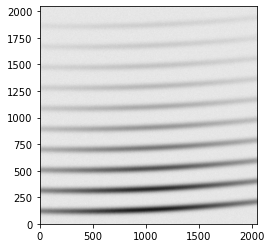

In [5]:
# Show image in log scale
#imshow(image, origin="lower", cmap="binary",norm=mpl.colors.LogNorm(image.min(), image.max()*1))
# Show image
plt.imshow(image, origin="lower", cmap="binary")

In [6]:
DIMO = image.shape[0] # DIMension Orders
DIMW = image.shape[1] # DIMension Wavelength
dv = 8
def make_mask(ordind, show=False, **kws):
        """
        converts linear coordinates into 2d mask to mask the image
        """
        dv = kws.get("dv", 8)

        l = pattern[:, ordind]
        cc = np.arange(-dv, dv + 1, 1)
        ii = ((np.zeros([DIMW, 1]) + cc).T + l).flatten()

        jj = np.repeat(np.arange(DIMW)[np.newaxis, ...], dv * 2 + 1, axis=0,).flatten()

        mask = (ii.astype(int, copy=False), jj.astype(int, copy=False))
        if not show:
            return mask
        else:
            pp = np.zeros((DIMW, DIMO), dtype=bool)
            pp[mask] = True
            return pp
        
cutting_masks = [make_mask(i, dv=dv) for i in range(pattern.shape[1])]

In [7]:
orderimages = []
for m in cutting_masks:
    img = image[m]
    order = img.reshape(dv * 2 + 1, DIMW)
    orderimages.append(order)

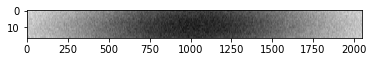

In [8]:
plt.imshow(orderimages[0],aspect=10,cmap='binary')

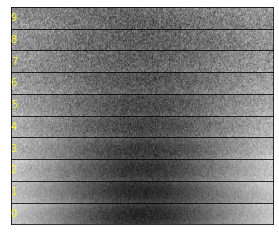

In [9]:
NORD = pattern.shape[1]
aspect=10

fig, axs = plt.subplots(NORD, 1)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.0)
[ax.set_xticks([]) for ax in axs[:-1]]
[ax.set_yticks([]) for ax in axs[:-1]]
[ax.set_xlim([0, DIMW]) for ax in axs]

for o, ax in enumerate(reversed(axs)):
    ax.imshow(orderimages[o], aspect=aspect,cmap='binary')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #ax.axis('off')
    ax.text(
        0, 0.5, o, transform=ax.transAxes, color="#fff83a", va="center", ha="left",
    )

# P.S.
In `echelle.py` cutting masks are implemented, all we need to supply is the `pattern.txt` file for the `calibration` class. 

The `read_image` method of `echelle.py` needs to be updated to be independent of image file format. Specify what parameters from the image are used in `echelle.py`, make a method to read image data and image parameters outside of the class. Probably make a separate `python` file with read methods.